<!-- Encabezado con estilo -->
<div align="center" style="background: linear-gradient(90deg, #1e3c72, #2a5298); padding: 30px; border-radius: 15px; color: white;">

  <h1>📊 Introducción al Análisis Predictivo en Python</h1>
  <h3>Ejercicio Practico 👉 “¿Qué factores influyen en el monto total de la compra (Sales) de un cliente?”</h3>

  <p>
    <img src="https://img.shields.io/github/last-commit/USERNAME/REPO?style=for-the-badge&logo=github" />
    <img src="https://img.shields.io/github/stars/USERNAME/REPO?style=for-the-badge&color=yellow&logo=github" />
    <img src="https://img.shields.io/github/license/USERNAME/REPO?style=for-the-badge&color=green" />
  </p>
</div>

---

## 📅 Fecha: *Sep 2025*  
## 👤 Autor: *Alejandro Maldonado*  

---

<!-- Sección con tarjeta -->
<div style="background:#f9f9f9; border-left: 6px solid #2a5298; padding: 15px; border-radius: 10px;">

### 📝 Objetivo


✅ Identificar qué tipo de clientes gastan más.  
✅ Saber si el género, sucursal, método de pago o tipo de producto influyen en las ventas.

</div>

---





In [14]:
#Importar librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data = pd.read_csv('SuperMarket.csv')
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
# Variables predictoras y variable objetivo
X = data[["Branch", "Customer type", "Gender", "Product line",
         "Unit price", "Quantity", "Payment", "Rating"]]
y = data["Sales"]

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)
print("Variables despues de get_dummies():")
X.head()

Variables despues de get_dummies():


,Unit price,Quantity,Rating,Branch_Cairo,Branch_Giza,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,9.1,False,False,False,False,False,False,True,False,False,False,True
1,15.28,5,9.6,False,True,True,False,False,False,False,False,False,False,False
2,46.33,7,7.4,False,False,True,False,False,False,False,True,False,True,False
3,58.22,8,8.4,False,False,False,False,False,False,True,False,False,False,True
4,86.31,7,5.3,False,False,False,False,False,False,False,False,True,False,True


In [16]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [19]:
#Evaluar el modelo
print("\n📈 Evaluación del modelo:")
print("R²:", round(r2_score(y_test, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))


📈 Evaluación del modelo:
R²: 0.902
RMSE: 79.9


In [20]:
Ticket_promedio = np.mean(data["Sales"])
print("Ticket promedio:", round(Ticket_promedio, 2))
print("Error de:", round((np.sqrt(mean_squared_error(y_test, y_pred)) / Ticket_promedio) * 100, 2), "%")

Ticket promedio: 322.97
Error de: 24.74 %


In [21]:
# Ver Coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("\n📊  Importancia de las Variables de las Ventas:")
print(coef_df) 


📊  Importancia de las Variables de las Ventas:
                            Variable  Coeficiente
1                           Quantity    58.069100
12               Payment_Credit card     9.965163
10   Product line_Home and lifestyle     6.976496
5               Customer type_Normal     6.763830
0                         Unit price     5.812468
4                        Branch_Giza     4.654978
8    Product line_Food and beverages     4.614298
7   Product line_Fashion accessories     1.343694
13                   Payment_Ewallet    -1.813253
11    Product line_Sports and travel    -2.652877
2                             Rating    -2.955169
9     Product line_Health and beauty    -4.180616
3                       Branch_Cairo    -5.349359
6                        Gender_Male    -8.823486


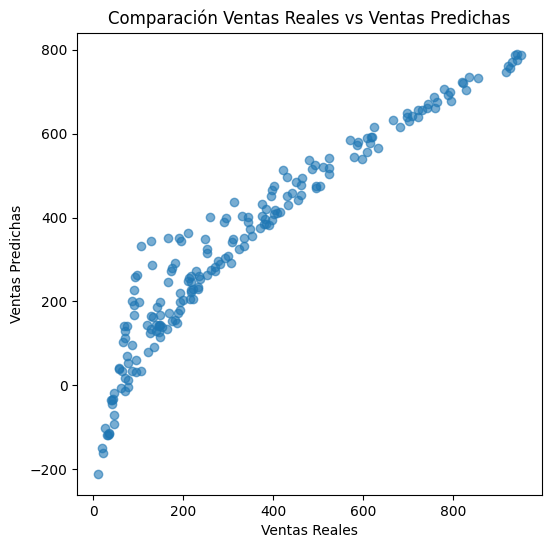

In [25]:
# Grafica Real Vs Predicción
plt.figure(figsize=(6,6))
plt.scatter(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Ventas Reales")
plt.ylabel("Ventas Predichas")
plt.title("Comparación Ventas Reales vs Ventas Predichas")
plt.show()

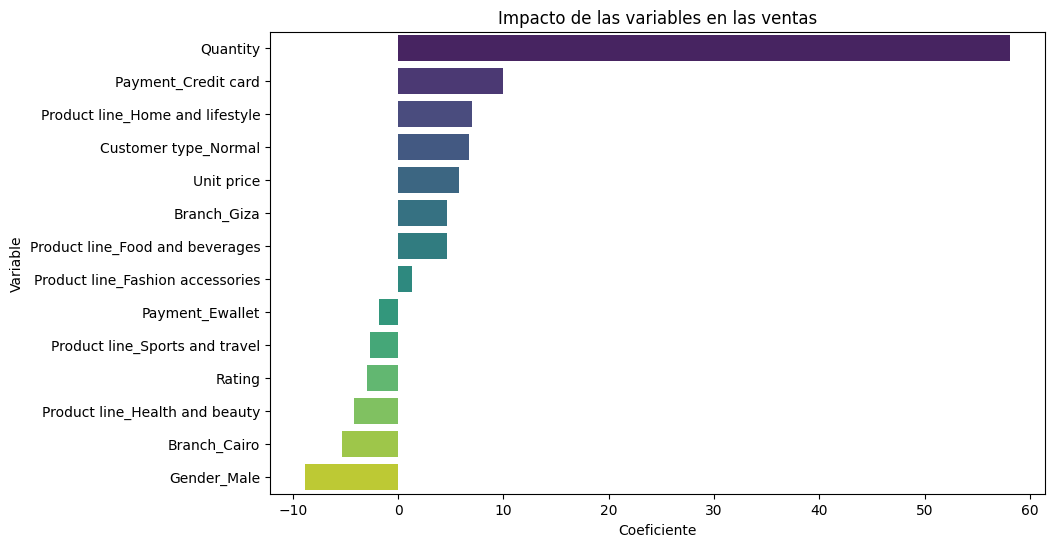

In [24]:
# Graficar importancia de las variables
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x="Coeficiente", y="Variable", hue="Variable", legend=False , palette="viridis")
plt.title("Impacto de las variables en las ventas")
plt.show()

# 📊 Dashboard de Conclusiones del Modelo de Predicción de Ventas  

---

<div style="background-color:#f5f5f5; padding:15px; border-radius:10px; box-shadow: 2px 2px 6px #ddd;">
  <h2 style="color:#2c3e50;">
    <img src="https://cdn-icons-png.flaticon.com/512/3135/3135715.png" width="30" style="vertical-align:middle;"/> 
    Conclusiones Generales
  </h2>
  <ul style="font-size:16px; line-height:1.8;">
    <li>✅ El modelo tiene un <b>alto desempeño (R² = 0.901)</b>, explicando más del 90% de la variabilidad en las ventas.</li>
    <li>📉 El error medio (<b>RMSE = 80.06 USD</b>) es bajo comparado con el <i>ticket promedio</i> de <b>322.97 USD</b>.</li>
    <li>📦 La <b>cantidad de productos vendidos</b> es el factor más influyente en las ventas.</li>
    <li>💳 Los <b>métodos de pago</b> y las <b>categorías de productos</b> impactan fuertemente en el ticket promedio.</li>
  </ul>
</div>

---

<div style="background-color:#ffffff; padding:15px; border-radius:10px; border: 1px solid #eee; box-shadow: 2px 2px 6px #ccc;">
  <h2 style="color:#16a085;">
    <img src="https://cdn-icons-png.flaticon.com/512/1828/1828640.png" width="28" style="vertical-align:middle;"/> 
    Conclusiones Específicas
  </h2>

  <table style="width:100%; border-collapse:collapse; font-size:15px;">
    <thead>
      <tr style="background-color:#16a085; color:white;">
        <th style="padding:8px; text-align:left;">📌 Hallazgo</th>
        <th style="padding:8px; text-align:center;">💲 Impacto</th>
        <th style="padding:8px; text-align:left;">📖 Interpretación</th>
      </tr>
    </thead>
    <tbody>
      <tr style="background-color:#f9f9f9;">
        <td><img src="https://cdn-icons-png.flaticon.com/512/679/679922.png" width="20"/> <b>Cantidad</b></td>
        <td style="text-align:center;">+58.08 USD</td>
        <td>Factor más determinante; cada unidad adicional aumenta las ventas.</td>
      </tr>
      <tr>
        <td><img src="https://cdn-icons-png.flaticon.com/512/633/633611.png" width="20"/> <b>Pago con tarjeta</b></td>
        <td style="text-align:center;">+9.74 USD</td>
        <td>Los clientes con tarjeta de crédito gastan más.</td>
      </tr>
      <tr style="background-color:#f9f9f9;">
        <td><img src="https://cdn-icons-png.flaticon.com/512/3076/3076325.png" width="20"/> <b>Home & Lifestyle</b></td>
        <td style="text-align:center;">+7.36 USD</td>
        <td>Categoría con gran potencial de ingresos.</td>
      </tr>
      <tr>
        <td><img src="https://cdn-icons-png.flaticon.com/512/1077/1077012.png" width="20"/> <b>Clientes Normales</b></td>
        <td style="text-align:center;">+6.37 USD</td>
        <td>Superan a los miembros en ticket promedio.</td>
      </tr>
      <tr style="background-color:#f9f9f9;">
        <td><img src="https://cdn-icons-png.flaticon.com/512/1077/1077063.png" width="20"/> <b>Clientes Masculinos</b></td>
        <td style="text-align:center;">-8.84 USD</td>
        <td>Gastan menos en promedio; requieren campañas personalizadas.</td>
      </tr>
      <tr>
        <td><img src="https://cdn-icons-png.flaticon.com/512/535/535239.png" width="20"/> <b>Sucursal Cairo</b></td>
        <td style="text-align:center;">-4.59 USD</td>
        <td>Menor desempeño relativo, posiblemente por demanda local.</td>
      </tr>
    </tbody>
  </table>
</div>

---

<div style="background-color:#ecf0f1; padding:15px; border-radius:10px; box-shadow: 2px 2px 6px #bbb;">
  <h2 style="color:#2980b9;">
    <img src="https://cdn-icons-png.flaticon.com/512/992/992651.png" width="28" style="vertical-align:middle;"/> 
    Síntesis Final
  </h2>
  <p style="font-size:16px; line-height:1.8;">
    El modelo permite <b>predecir con precisión las ventas</b> y descubrir 
    <b>palancas clave de negocio</b>:
  </p>
  <ul style="font-size:16px; line-height:1.8;">
    <li>📦 Incentivar ventas por volumen.</li>
    <li>💳 Promover pagos con tarjeta de crédito.</li>
    <li>🏠 Potenciar <b>Home & Lifestyle</b>.</li>
    <li>🎯 Revisar beneficios de fidelización.</li>
    <li>👨 Dirigir campañas a clientes masculinos.</li>
    <li>📢 Impulsar categorías débiles (Health & Beauty, Sports & Travel).</li>
  </ul>
</div>
